# Проектная работа: Принятие решений в бизнесе

Перед нами поставлена задача увеличить выручку интернет-магазина. Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запуститить A/B-тест и проанализировать результаты.


##  Часть 1. Приоритизация гипотез.

Загрузим данные о 9 гипотезах по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

In [1]:
# Импортируем все необходимые библиотеки:

import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
# Прочитаем данные файла
pd.set_option('display.max_colwidth', 3)
data = pd.read_csv(r'E:\Analytics\hypothesis.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В полученном файле видим следующую информацию:

•	Hypothesis — краткое описание гипотезы;

•	Reach — охват пользователей по 10-балльной шкале;

•	Impact — влияние на пользователей по 10-балльной шкале;

•	Confidence — уверенность в гипотезе по 10-балльной шкале;

•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Проверка гипотез стоит дорого и ресурсов, как правило, не хватает. Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса необходимо приоритизировать сформулированные гипотезы. Для этих целей применим одни из самых популярных методов приоритизации задач:  ICE  и RICE.


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [3]:
# Добавим столбец ICE к существующей таблице. Расчет произведем по известной формуле: ICE = Impact x Confidence / Efforts

data['ICE'] = round(data['Impact']*data['Confidence']/data['Efforts'],2)
data[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно методу ICE первой следует запустить гипотезу №9 - Акция на скидку в день рождения. Гипотезы 1,8 и 7 также в приоритете.

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

В отличии от метода ICE  в методе RICE учитываетя также охват пользователей.

In [4]:
# Добавим столбец RICE к существующей таблице. Расчет произведем по известной формуле: RICE = Reach x Impact x Confidence / Efforts

data['RICE'] = data['Reach']*data['Impact']*data['Confidence']/data['Efforts']
data[['Hypothesis','RICE','Reach']].sort_values('RICE', ascending=False)

,Hypothesis,RICE,Reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


In [5]:
hypo_data = data[['Hypothesis','RICE','ICE']].sort_values('RICE', ascending=False)
hypo_data.style.highlight_max(color='yellowgreen', subset=['RICE','ICE']).highlight_min(color='coral', subset=['RICE','ICE'])

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11.2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1


По методу RICE -  следует запускать гипотезы 8, 3, 1 и 7.

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Действительно, гипотезы 1 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 3 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	" и 7 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" в приоритете согласно обоим методам, при этом гипотезы - лидеры в обоих методах различаются. Это связано с математической формулой для каждого метода: результат по методу RICE всегда будет в 'Reach' раз больше. У гипотезы №8 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" параметр Reach=10, а гипотезы №9 - "Запустить акцию, дающую скидку на товар в день рождения" (лидер по методу ICE) - параметр Reach=1. Поэтому, помимо Impact гипотезы следует также учитывать как много пользователей она затронет.

Следует запустить А/В тест для гипотезы - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

##  Часть 2. Анализ A/B-теста.

Согласно условию задачи - мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Изучим исходные данные и выполним предобработку. Произведем проверку пропусков и дубликатов. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. 

In [6]:
# Прочитаем исходные файлы
orders = pd.read_csv(r'E:\Analytics\orders.csv', sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [7]:
visitors = pd.read_csv(r'E:\Analytics\visitors.csv', sep=',')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


Перед началом основной работы проверим таблицы на пропуски и дубликаты:

In [8]:
# Пропуски в таблице orders
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
# дубликаты в таблице orders
orders.duplicated().sum()

0

In [10]:
# Пропуски в таблице visitors
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
# дубликаты в таблице visitors
visitors.duplicated().sum()

0

Пропусков и явных дубликатов нет, наименования колонок в нижнем регистре, типы данных соответствуют данным за исключением столбцов с датами. Преобразуем данные дат к нужному типу:

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Теперь можно перейти к основной задаче по анализу А/B теста.

Поскольку мы проводим А/В тест, основной сутью которого является правильное деление пользователей на группы, не лишним будет проверить, что каждый пользователь попал только в одну группу теста:

In [13]:
users = orders.groupby('visitorId').agg({'group': 'count'}).query('group==2')
users.head()

,group
visitorId,
8300375,2
232979603,2
276558944,2
351125977,2
366673373,2


In [14]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    58
dtype: int64

У нас 58 пользователя, которые попали в обе группы. Поскольку, это число не значительно относительно общего количества пользователей, удалять задвоившихся пользователей не будем.

In [15]:
orders['visitorId'].nunique()

1031

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:

•	date — дата;

•	group — группа A/B-теста (A или B);

•	orders — кумулятивное количество заказов на указанную дату в указанной группе;

•	buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

•	revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

•	visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():


In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 


In [17]:
#Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [18]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [19]:
# Объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

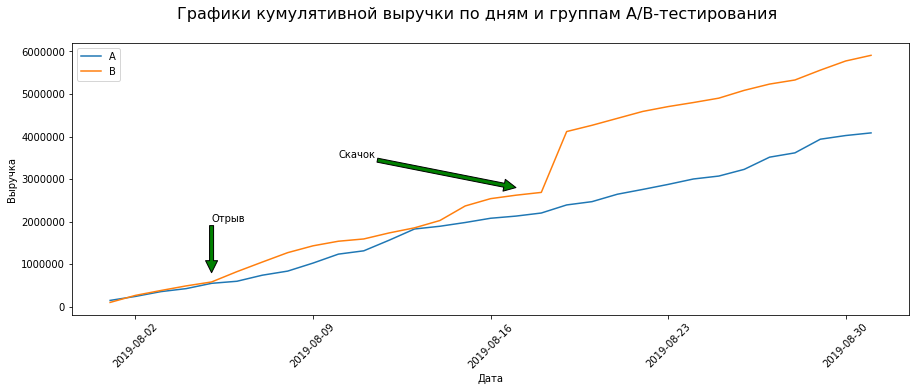

In [22]:
# Строим график выручки группы А:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B:
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.suptitle('Графики кумулятивной выручки по дням и группам A/B-тестирования', fontsize= 16)  
plt.xticks(rotation=45)

plt.annotate('Cкачок', xy=(dt.datetime(2019, 8, 17), 2800000), xytext=(dt.datetime(2019, 8, 10), 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('Отрыв', xy=(dt.datetime(2019, 8, 5), 800000), xytext=(dt.datetime(2019, 8, 5), 2000000),
            arrowprops=dict(facecolor='g'))

plt.show()


Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы следует проанализировать.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

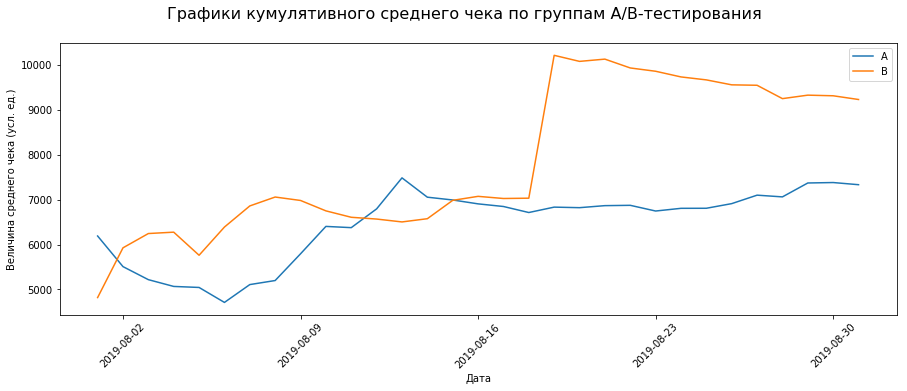

In [23]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.suptitle('Графики кумулятивного среднего чека по группам A/B-тестирования', fontsize= 16) 
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Величина среднего чека (усл. ед.)')
plt.show()


Средний чек становится равномерным ближе к концу теста для группы А, для группы В наблюдается рост в начале теста, резкий скачок и снижение к концу теста. В группу B 18 августа 2019 года явно попали крупные заказы (резкий всплеск на графике). В этом случае для группы В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.  Сделаем выводы и предположения.

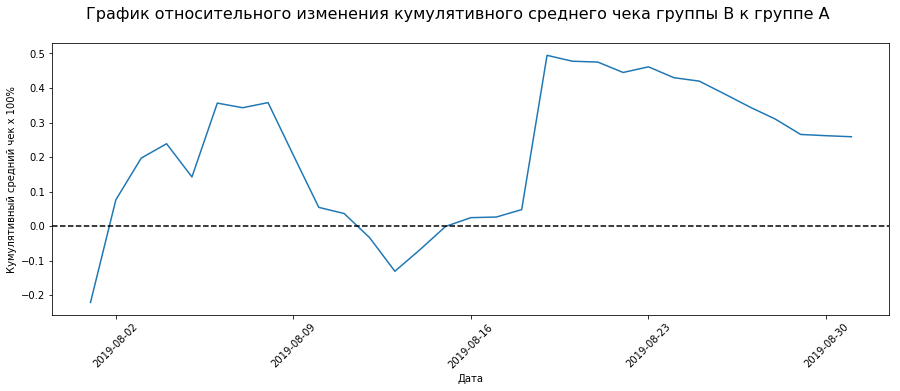

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.suptitle('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize= 16) 
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек х 100%')
plt.show()

В нескольких точках график различия между сегментами резко «скачет», что говорит о наличии крупных заказов и выбросов.

### Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения.

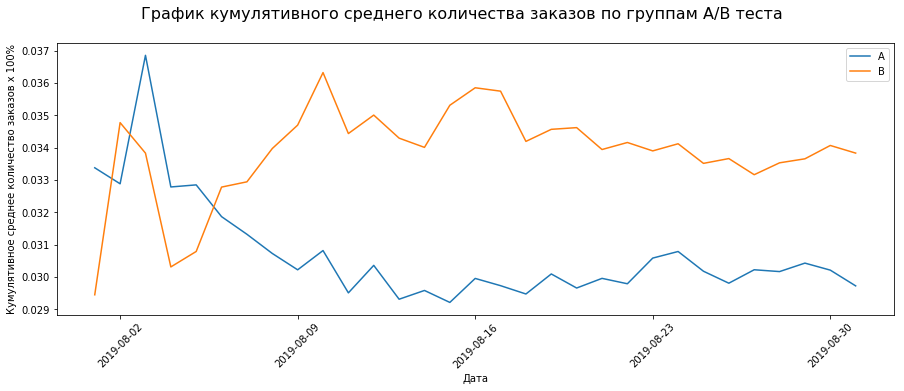

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.suptitle('График кумулятивного среднего количества заказов по группам А/В теста', fontsize= 16) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов х 100%')
plt.show()


По графику видим следующее: В начале теста группы демонстрируют рост конверсии, а затем ее снижение. Далее графики групп идут симметрично относительно одного значения. Конверсия группы B выросла и зафиксировалась, в то время как конверсия группы А просела и также зафиксировалась.

### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.

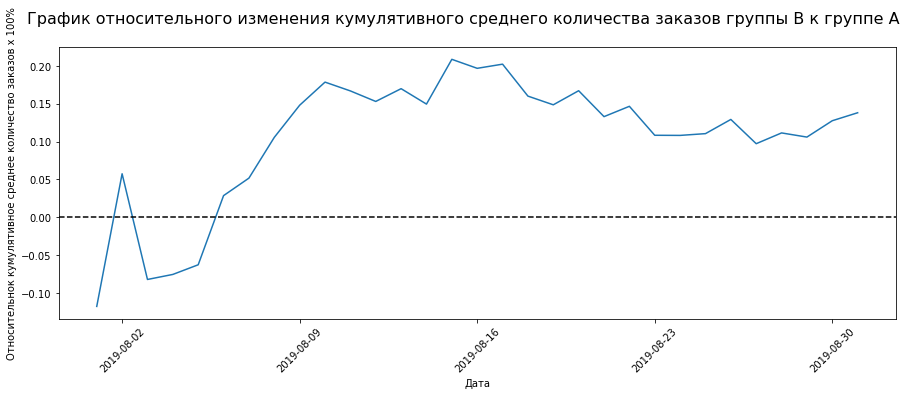

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.suptitle('График относительного изменения кумулятивного среднего количества заказов группы B к группе A', fontsize= 16) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
# plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительнок кумулятивное среднее количество заказов х 100%')
plt.show()

#plt.axhline(y=-0.1, color='grey', linestyle='--')


В начале теста группа B с переменным успехом проигрывала группе A, затем вырвалась вперёд. Вцелом группа B лидирует по конверсии: зафиксировалась около прироста в 10% относительно группы A.
Для окончательного вывода по результату А/В теста следует проанализировать аномалии, возможно, они изменят картину. 

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. «Обычный» пользователь совершает не больше двух заказов за короткий срок.

In [27]:
# сгруппирует заказы по пользователям:
ordersByUsers = orders.groupby('visitorId',as_index=False).agg({'transactionId': 'nunique'})

ordersByUsers.columns = ['user_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.
Построим гистрограмму распределения количества заказов на одного пользователя.


Text(0,0.5,'Количество заказов')

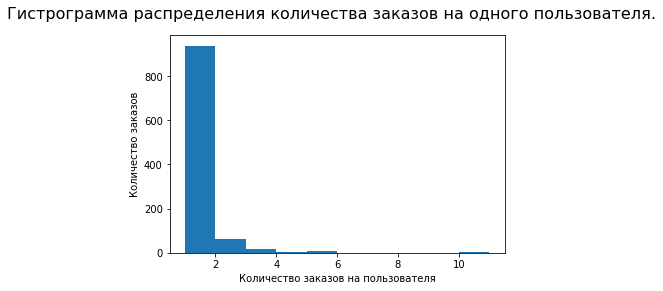

In [28]:
plt.hist(ordersByUsers['orders']) 
plt.suptitle('Гистрограмма распределения количества заказов на одного пользователя.', fontsize= 16) 
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество заказов')

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя:


Text(0,0.5,'Количество заказов')

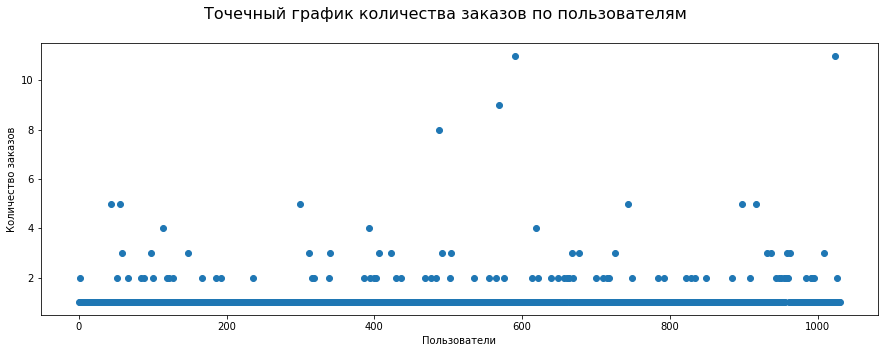

In [29]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.suptitle('Точечный график количества заказов по пользователям', fontsize= 16) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')


Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 	Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [30]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более одного раза.
Таким образом, выбираем 2 заказа на одного пользователя за верхнюю границу числа заказов. Остальных пользователей следует отсеять.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

Аномально дорогие заказы искажают результаты А\В теста и делают победителем ту группу, где они оказались. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.
Такие аномально дорогие заказы следует удалять из теста. Слишком маленькие заказы слабо влияют на средний чек, поэтому их удалать не будем.
Изучим гистограмму распределения стоимостей заказов:

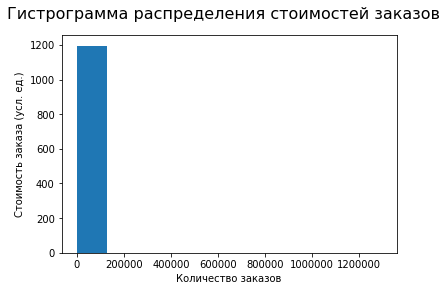

In [31]:
plt.hist(orders['revenue']) 
plt.suptitle('Гистрограмма распределения стоимостей заказов', fontsize= 16) 
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа (усл. ед.)')
plt.show()

В данных явно есть очень дорогие заказы. Однако большинство всё-таки имеет меньшую выручку.
Оценим стоимость заказов точечным графиком:

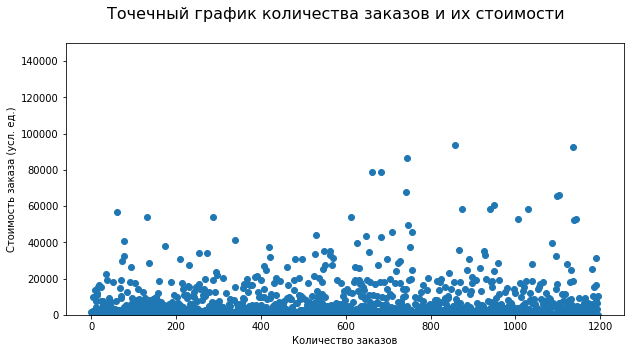

In [32]:
plt.figure(figsize=(10, 5))
plt.ylim([0, 150000])
plt.suptitle('Точечный график количества заказов и их стоимости', fontsize= 16) 
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа (усл. ед.)')
plt.show()

Основная масса заказов на сумму менее 25 000 рублей.

### 	Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [33]:
# Определим 90, 95 и 99 перцентили среднего чека в выборке:

np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Границу по стоимости заказа определим на уровне 28 000 рублей.

### 	Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали
# хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


'0.00840'

'0.138'

Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть.
Первое число — p-value = 0.00840 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выйгрыш группы B равен 13.8%.


### 	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:


In [35]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


'0.365'

'0.259'

P-value значительно больше 0.05. Значит, нулевую гипотезу не отвергаем и считаем, что в среднем чеке различий нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### 	Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [36]:
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

74

У нас 74 аномальных пользователя.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders', ), ], axis=0,)


sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders',),] , axis=0,) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [38]:
display('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


'0.007'

'0.173'

Результаты по среднему количеству заказов практически не изменились. 

### 	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [39]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

display("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 


'0.369'

'-0.020'

P-value практически не изменился (было 0,365), но разница между сегментами сократилась с 26% до 2%.

### 	Примим решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

По заверешении работы имеем следубщие факты:

•	Есть статистически значимое различие по среднему количеству заказов между группами по «сырым», ни по данным после фильтрации аномалий;

•	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

•	График различия конверсии между группами сообщает, что результаты группы B лучше группы A:


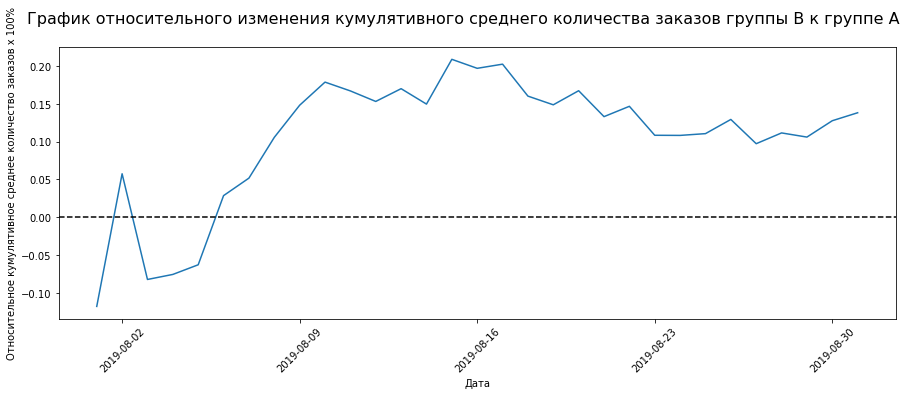

In [40]:
plt.figure(figsize=(15, 5))
plt.suptitle('График относительного изменения кумулятивного среднего количества заказов группы B к группе A', fontsize= 16) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное кумулятивное среднее количество заказов х 100%')
plt.show()

 •	График различия среднего чека говорит о том, что результаты группы B колебались и сейчас почти на 20% лучше первоначального:

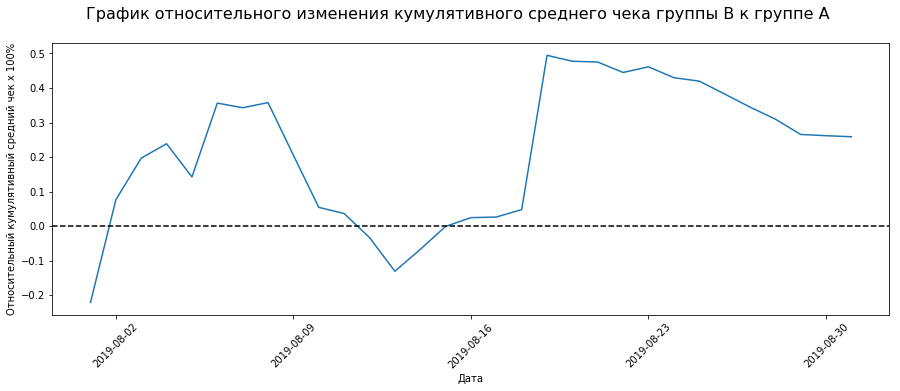

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.suptitle('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize= 16) 
plt.xlabel('Дата')
plt.ylabel('Относительный кумулятивный средний чек х 100%')
plt.show()

Таким образом, можно сделать вывод о том, что тест можно остановить: победила группа B.

В ходе работы был проведен А/В тест выбранной гипотезы: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

- Прежде всего были проверены данные на предмет корректности А/В теста, а именно, что каждый пользователь попал исключительно в одну группу тесирования. Оказалось, что имеется 58 пользователей, которые видели оба варианта лендинга. Ввиду незначительного их количества (менее 6% от общего количества пользователей) этих пользователей решено оставить в исследовании.

- Построив графики кумулятивной выручки по группам A/B-тестирования видим следующее: Выручки по обеим группам растут одинаково - линии графика слились в одну. Далее 5 августа линия группы В отрывается вверх от линии группы А. Выручки продолжают равномерно расти. Однако график выручки группы В имеет резкий скачок 18 августа 2019 года. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы далее будут проанализированы.

- Построив графики кумулятивного срднего чека по группам A/B-тестирования видим следующее: Средний чек становится равномерным ближе к концу теста для группы А, для группы В наблюдается рост в начале теста, резкий скачок (более, чем на 3000 усл. ед.) и снижение к концу теста до уровня около 9000 усл. ед. В группу B 18 августа 2019 года явно попали крупные заказы (резкий всплеск на графике). Для группы В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

- Далее изучили График относительного изменения кумулятивного среднего чека группы B к группе A. В нескольких точках график различия между сегментами резко «скачет», что говорит о наличии крупных заказов и выбросов в эти даты.

- Далее был построен График кумулятивного среднего количества заказов по группам А/В теста'. По графику видим следующее: В начале теста группы демонстрируют рост конверсии, а затем ее снижение. Далее графики групп идут симметрично относительно одного значения. Конверсия группы B выросла и зафиксировалась, в то время как конверсия группы А просела и также зафиксировалась.

- График относительного изменения кумулятивного среднего количества заказов группы B к группе A сообщает следующее: В начале теста группа B с переменным успехом проигрывала группе A, затем вырвалась вперёд. Вцелом, группа B лидирует по конверсии: зафиксировалась около прироста в 10% относительно группы A.

- После очистки данных от выбросов общая картина не изменилась: Средний чек в группе В вырос на 50%, Конверсия в группе В выросла на 20%. 

Таким образом можно принять А/В тест состоявшимся и завершившимся успехом группы В с гипотезой - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.